In [1]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

def fft_from_data_frame(data_frame):
    fs= 114e3
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

import glob

def get_fft_set(file_names):
    fft_set = []
    for files in file_names:
        data = pd.read_csv(files)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front_1 = glob.glob('./Documents/data_set/Result_without_filter/Car/67_Ford_Black_front/*_overall.csv')
car_front_2 = glob.glob('./Documents/data_set/Result_without_filter/Car/99_Fiesta_Purple_front/*_overall.csv')
car_side_1 = glob.glob('./Documents/data_set/Result_without_filter/Car/99_Fiesta_Purple_side/*_overall.csv')
car_side_2 = glob.glob('./Documents/data_set/Result_without_filter/Car/129_Skoda_Grey_side/*_overall.csv')
car_back_1 = glob.glob('./Documents/data_set/Result_without_filter/Car/26_Ford_Black_back/*_overall.csv')
car_back_2 = glob.glob('./Documents/data_set/Result_without_filter/Car/66_Ford_Purple_back/*_overall.csv')

motorbike_1 = glob.glob('./Documents/data_set/Result_without_filter/Motorbike/92_CBF_Honda_side1/*_overall.csv')
motorbike_2 = glob.glob('./Documents/data_set/Result_without_filter/Motorbike/92_CBF_Honda_side2/*_overall.csv')

cycle_1 = glob.glob('./Documents/data_set/Result_without_filter/Cycle/Cycle_1/*_overall.csv')

human_A = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_A/*_overall.csv')
human_B = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_B/*_overall.csv')
human_C = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_C/*_overall.csv')
human_D = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_D/*_overall.csv')
human_E = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_E/*_overall.csv')
human_F = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_F/*_overall.csv')
human_G = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_G/*_overall.csv')
human_H = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_H/*_overall.csv')
human_I = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_I/*_overall.csv')

pillar_1 = glob.glob('./Documents/data_set/Result_without_filter/Pillar/Pillar_1/*_overall.csv')
pillar_2 = glob.glob('./Documents/data_set/Result_without_filter/Pillar/Pillar_2/*_overall.csv')
pillar_3 = glob.glob('./Documents/data_set/Result_without_filter/Pillar/Pillar_3/*_overall.csv')

stopper_1 = glob.glob('./Documents/data_set/Result_without_filter/Stopper/Stopper_1/*_overall.csv')
stopper_2 = glob.glob('./Documents/data_set/Result_without_filter/Stopper/Stopper_2/*_overall.csv')

wall_1 = glob.glob('./Documents/data_set/Result_without_filter/Wall/Wall_1/*_overall.csv')
wall_2 = glob.glob('./Documents/data_set/Result_without_filter/Wall/Wall_2/*_overall.csv')
wall_3 = glob.glob('./Documents/data_set/Result_without_filter/Wall/Wall_3/*_overall.csv')

car_front_1_fft = get_fft_set(car_front_1)
car_front_2_fft = get_fft_set(car_front_2)
car_side_1_fft = get_fft_set(car_side_1)
car_side_2_fft = get_fft_set(car_side_2)
car_back_1_fft = get_fft_set(car_back_1)
car_back_2_fft = get_fft_set(car_back_2)

motorbike_1_fft = get_fft_set(motorbike_1)
motorbike_2_fft = get_fft_set(motorbike_2)

cycle_1_fft = get_fft_set(cycle_1)

human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
human_D_fft = get_fft_set(human_D)
human_E_fft = get_fft_set(human_E)
human_F_fft = get_fft_set(human_F)
human_G_fft = get_fft_set(human_G)
human_H_fft = get_fft_set(human_H)
human_I_fft = get_fft_set(human_I)

pillar_1_fft = get_fft_set(pillar_1)
pillar_2_fft = get_fft_set(pillar_2)
pillar_3_fft = get_fft_set(pillar_3)

stopper_1_fft = get_fft_set(stopper_1)
stopper_2_fft = get_fft_set(stopper_2)

wall_1_fft = get_fft_set(wall_1)
wall_2_fft = get_fft_set(wall_2)
wall_3_fft = get_fft_set(wall_3)

In [2]:
car = car_front_1_fft + car_front_2_fft + car_side_1_fft + car_side_2_fft + car_back_1_fft + car_back_2_fft
motorbike = motorbike_1_fft + motorbike_2_fft
cycle = cycle_1_fft
human = human_A_fft + human_B_fft + human_C_fft + human_D_fft + human_E_fft + human_F_fft + human_G_fft + human_H_fft + human_I_fft
pillar = pillar_1_fft + pillar_2_fft + pillar_3_fft
concrete = stopper_1_fft + stopper_2_fft
wall = wall_1_fft + wall_2_fft + wall_3_fft
 
print("Car: ",len(car))
print("Motorbike: ",len(motorbike))
print("Cycle: ",len(cycle))
print("Human: ",len(human))
print("Pillar: ",len(pillar))
print("Concrete: ",len(concrete))
print("Wall: ",len(wall))
result = len(car) + len(motorbike) + len(cycle) + len(human) + len(pillar) + len(concrete) + len(wall)
print("Total data:", result)

Car:  11234
Motorbike:  2122
Cycle:  294
Human:  5124
Pillar:  9362
Concrete:  2372
Wall:  5034
Total data: 35542


In [3]:
Non_Human = car + motorbike + cycle + pillar + concrete + wall

In [4]:
from sklearn.model_selection import train_test_split
def split(X_, index):
    y_ = [index]*len(X_)
    return train_test_split(X_, y_, test_size=0.40, random_state=42)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 14, whiten='True')
human_after_pca = pca.fit(human).transform(human)
non_human_after_pca = pca.fit(Non_Human).transform(Non_Human)
print(human_after_pca.shape)
print(non_human_after_pca.shape)
# print(data_after_pca.shape)

(5124, 14)
(30418, 14)


In [6]:
X_Human_train, X_Human_test, y_Human_train, y_Human_test = split(human_after_pca, 'HUMAN')
X_Non_Human_train, X_Non_Human_test, y_Non_Human_train, y_Non_Human_test = split(non_human_after_pca, 'NOT HUMAN')

X_Human_Non_Human_train = np.concatenate((X_Human_train, X_Non_Human_train), axis=0)
X_Human_Non_Human_test = np.concatenate((X_Human_test, X_Non_Human_test), axis=0)
y_Human_Non_Human_train = np.concatenate((y_Human_train, y_Non_Human_train), axis=0)
y_Human_Non_Human_test = np.concatenate((y_Human_test, y_Non_Human_test), axis=0)

# print(np.array(X_Human_train).shape,np.array(X_Human_test).shape, np.array(y_Human_train).shape, np.array(y_Human_test).shape)
# print(np.array(X_Non_Human_train).shape, np.array(X_Non_Human_test).shape, np.array(y_Non_Human_train).shape, np.array(y_Non_Human_test).shape)

In [7]:
from sklearn import preprocessing
normalized_X_Human_Non_Human_train = preprocessing.normalize(X_Human_Non_Human_train)
# normalized_X_Human_Non_Human_train = preprocessing.scale(normalized_X_Human_Non_Human_train)

normalized_X_Human_Non_Human_test = preprocessing.normalize(X_Human_Non_Human_test)
# normalized_X_Human_Non_Human_test = preprocessing.scale(normalized_X_Human_Non_Human_test)

print('X train data : ',np.array(X_Human_Non_Human_train).shape)
print('y train data : ',np.array(y_Human_Non_Human_train).shape)
print('X test data : ',np.array(X_Human_Non_Human_test).shape)
print('y test data : ',np.array(y_Human_Non_Human_test).shape)

X train data :  (21324, 14)
y train data :  (21324,)
X test data :  (14218, 14)
y test data :  (14218,)


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

def create_confusion_matrix(y_test, result):
    cm = confusion_matrix(y_test, result)
    import seaborn as sns
    import matplotlib.pyplot as plt     
    sum = np.sum(cm, axis=1)
    score = accuracy_score(y_test, result)

    from sklearn.metrics import precision_score, recall_score, f1_score
    precision_CLASS_A = round(precision_score(y_test, result, average='binary',pos_label=labels[0]),2)
    precision_CLASS_B = round(precision_score(y_test, result, average='binary',pos_label=labels[1]),2)
    recall_CLASS_A = round(recall_score(y_test, result, average='binary',pos_label=labels[0]),2)
    recall_CLASS_B = round(recall_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_CLASS_A = round(f1_score(y_test, result, average='binary',pos_label=labels[0]),2)
    f1_CLASS_B = round(f1_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_average = round((f1_CLASS_A + f1_CLASS_B)/2, 2);
#     print('Precision: Class A',precision_CLASS_A)
#     print('Precision: Class B',precision_CLASS_B)
#     print('Recall: Class A',recall_CLASS_A)
#     print('Recall: Class B',recall_CLASS_B)
#     print('F1-Score: Class A',f1_CLASS_A)
#     print('F1-Score: Class B',f1_CLASS_B)
#     print('Average F1-score:', f1_average)

    cm_new = np.append(cm[0], recall_CLASS_A)
    cm_new2 = np.append(cm[1], recall_CLASS_B)
    cm_new3 = np.array([precision_CLASS_A, precision_CLASS_B, score])
    cm = np.array([cm_new,cm_new2,cm_new3])


    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Reds"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    counter = 0
    for i in range(0,2):
        for j in range(0,3):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 2:
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1

    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);

[[  846  1204]
 [   11 12157]]
Accuracy:  0.914544943029962


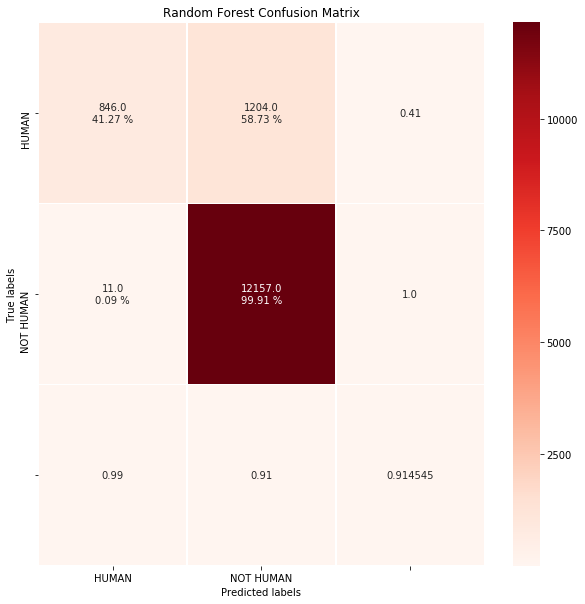

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
result = clf.predict(normalized_X_Human_Non_Human_test)

cm = confusion_matrix(y_Human_Non_Human_test, result)
print(cm)
print("Accuracy: ",accuracy_score(y_Human_Non_Human_test, result))
labels = ['HUMAN', 'NOT HUMAN']
title = ('Random Forest Confusion Matrix')
create_confusion_matrix(y_Human_Non_Human_test, result)

[[ 1376   674]
 [   39 12129]]
0.9498522999015333


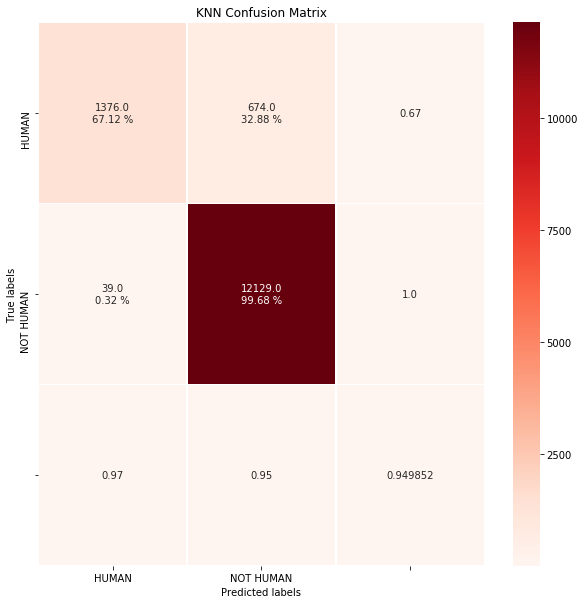

In [17]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
result = clf.predict(normalized_X_Human_Non_Human_test)


# print('\nThe number of neighbors used to predict the target : ',clf.n_neighbors)

cm = confusion_matrix(y_Human_Non_Human_test, result)
print(cm)
print(accuracy_score(y_Human_Non_Human_test, result))
labels = ['HUMAN', 'NOT HUMAN']
title = ('KNN Confusion Matrix')
create_confusion_matrix(y_Human_Non_Human_test, result)